Visualisation of Saliency and Smooth Gradient Saliency Maps.

Library used: tf_keras_vis (https://github.com/keisen/tf-keras-vis)

Few lines of code based on the examples from the repository mentioned above.

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

In [2]:
# Load model
model = tf.keras.models.load_model("model/VGG.h5")

In [3]:
NUM_CLASSES = 130
DATA_PATH = "data/"
CLASSES = ["dog", "bird", "berry", "flower", "other"]

In [4]:
data = []
for i in range(NUM_CLASSES):
    path = DATA_PATH + CLASSES[0] + "/" + str(i+1) + "_256.jpg"
    img = load_img(path, target_size=(224, 224))
    data.append(np.array(img))

data = np.asarray(data).astype("float32")

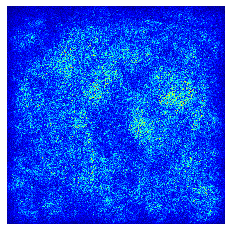

In [5]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

saliency = Saliency(model, model_modifier)
loss = lambda output: K.mean(output[:, 2])

saliency_map = saliency(loss, data)
saliency_map = normalize(saliency_map)


# for i in range(10):
#     plt.imshow(saliency_map[i], cmap='jet')
#     plt.show()

for i in range(NUM_CLASSES):
    path = DATA_PATH + CLASSES[0] + "/saliency_maps/" + str(i+1) + "VGG" + "_256.jpg"
    plt.imshow(saliency_map[i], cmap='jet')
    plt.gca().set_axis_off()
    plt.margins(0,0)
    plt.savefig(path, bbox_inches='tight')

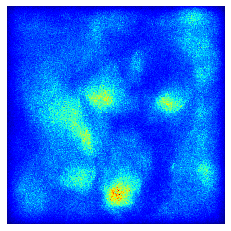

In [6]:
saliency_map = saliency(loss, data, smooth_samples=20)
saliency_map = normalize(saliency_map)

for i in range(NUM_CLASSES):
    path = DATA_PATH + CLASSES[0] + "/saliency_maps/" + str(i+1) + "VGG" + "_256_smoothgrad.jpg"
    plt.imshow(saliency_map[i], cmap='jet')
    plt.gca().set_axis_off()
    plt.margins(0,0)
    plt.savefig(path, bbox_inches='tight')